# Bike Sharing Demand Prediction

##### **Project Type**    -  Regression
##### **Contribution**    - Individual
##### **Name -**   Shrikant Narayan Patole.



# **Project Summary**

Currently Rental bikes are introduced in many urban cities for the enhancement of
mobility comfort. It is important to make the rental bike available and accessible to
the public at the right time as it lessens the waiting time. Eventually, providing the
city with a stable supply of rental bikes becomes a major concern. The crucial part
is the prediction of bike count required at each hour for the stable supply of rental
bikes.

# **Github Link**

# **Problem Statement**

Currently Rental bikes are introduced in many urban cities for the enhancement of
mobility comfort. It is important to make the rental bike available and accessible to
the public at the right time as it lessens the waiting time. Eventually, providing the
city with a stable supply of rental bikes becomes a major concern. The crucial part
is the prediction of bike count required at each hour for the stable supply of rental
bikes.

## **1. Know Your Data**

### **Importing Libraries**

In [3]:
#importing the libraries
import numpy as np
import pandas as pd
from numpy import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Importing the dataset 
dataset=pd.read_csv('SeoulBikeData.csv',encoding= 'unicode_escape')

In [5]:
#Initial overview of data
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
dataset.shape

(8760, 14)

### Variable Description


**Date**	- Date the Bike was rented

**Rented Bike count** - Total no of rentals

**Hour** - total hours count of the day

**Temperature(°C)**	- Temperature in °C

**Humidity(%)**	- Humidity in %

**Wind speed (m/s)** - Wind speed in m/s

**Visibility (10m)** - Visibility within 10 𝑚 range

**Dew point temperature(°C)** - Dew Point Temperature in °C

**Solar Radiation (MJ/m2)**	- light and energy that comes from the sun in MJ/m2

**Rainfall(mm)**	-Rain fall in mm

**Snowfall (cm)**	-Snow fall in cm

**Seasons**	- Autumn, Spring, Summer, Winter

**Holiday**	-Whether the day is considered a holiday

**Functioning Day**	-Whether the day is neither a weekend nor holiday

In [7]:
#Renaming the columns for better understanding
dataset.rename(columns={'Rented Bike Count': 'Rented_bike_count','Temperature(°C)':'Temperature','Humidity(%)':'Humidity','Wind speed (m/s)': 'Windspeed','Visibility (10m)':'Visibility','Dew point temperature(°C)':'Dew_temp','Solar Radiation (MJ/m2)':'SolarRadiation','Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall','Functioning Day':'Functioning_day'}, inplace=True)

In [8]:
#Checking null values count and datatype of each feature
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               8760 non-null   object 
 1   Rented_bike_count  8760 non-null   int64  
 2   Hour               8760 non-null   int64  
 3   Temperature        8760 non-null   float64
 4   Humidity           8760 non-null   int64  
 5   Windspeed          8760 non-null   float64
 6   Visibility         8760 non-null   int64  
 7   Dew_temp           8760 non-null   float64
 8   SolarRadiation     8760 non-null   float64
 9   Rainfall           8760 non-null   float64
 10  Snowfall           8760 non-null   float64
 11  Seasons            8760 non-null   object 
 12  Holiday            8760 non-null   object 
 13  Functioning_day    8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.3+ KB


In [9]:
#Changing the 'Date' column to datetime datatype
dataset['Date'] = pd.to_datetime(dataset['Date']) 
dataset['Date']

0      2017-01-12
1      2017-01-12
2      2017-01-12
3      2017-01-12
4      2017-01-12
          ...    
8755   2018-11-30
8756   2018-11-30
8757   2018-11-30
8758   2018-11-30
8759   2018-11-30
Name: Date, Length: 8760, dtype: datetime64[ns]

In [10]:
#Separating the Year,Month and date from datetime 
dataset['Day']=dataset['Date'].dt.day
dataset['WeekDay']=dataset["Date"].dt.day_name() 
dataset['Month']=dataset['Date'].dt.month
dataset['Year']=dataset['Date'].dt.year

#dropping the date column
dataset.drop(columns=['Date','Day'],inplace=True)

In [11]:
#Detailed stats of data
dataset.describe(include='all')

,Rented_bike_count,Hour,Temperature,Humidity,Windspeed,Visibility,Dew_temp,SolarRadiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_day,WeekDay,Month,Year
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760,8760,8760.000000,8760.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2,7,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes,Sunday,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465,1296,NaN,NaN
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN,NaN,6.526027,2017.915068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN,NaN,3.448048,0.278796
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,2017.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,4.000000,2018.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN,NaN,7.000000,2018.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN,NaN,10.000000,2018.000000


In [12]:
#Duplicates and null values
len(dataset[dataset.duplicated()])

0

In [13]:
#checking null values in the data
dataset.isnull().sum()

Rented_bike_count    0
Hour                 0
Temperature          0
Humidity             0
Windspeed            0
Visibility           0
Dew_temp             0
SolarRadiation       0
Rainfall             0
Snowfall             0
Seasons              0
Holiday              0
Functioning_day      0
WeekDay              0
Month                0
Year                 0
dtype: int64

In [14]:
# There are some values with 0 humidity which is practically impossible
print(dataset['Humidity'].value_counts()[0])
#dropping rows with 0 value of humidity
dataset=dataset.drop(dataset[dataset['Humidity'] == 0].index)

17


In [15]:
#Checking the value count of days are functional or not
print(dataset['Functioning_day'].value_counts())
#Bikes are rented on non-functioning days? 
dataset.groupby('Functioning_day').max()['Rented_bike_count']

Yes    8448
No      295
Name: Functioning_day, dtype: int64


Functioning_day
No        0
Yes    3556
Name: Rented_bike_count, dtype: int64

In [16]:
#As we see above bikes are not rented on nonfunctioning days,so we drop the rows without functioning days 
dataset=dataset.drop(dataset[dataset['Functioning_day'] == 'No'].index)
#as all remaining rows are functional days,we drop the column
dataset=dataset.drop(['Functioning_day'], axis = 1)

# Exploratory Data Analysis

#### 1.Bikes demand on Holidays and Non Holidays

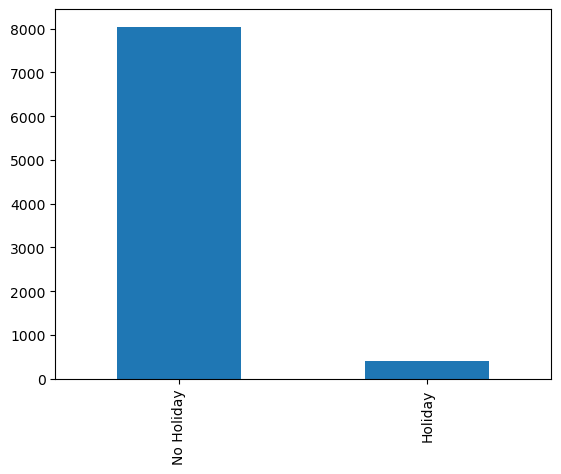

In [17]:
holiday_demand=dataset['Holiday'].value_counts().plot(kind='bar',y='Rented_bike_count')

**Observation:** The demand for bikes is very low on holidays.The company receives approximately only 5% of all orders during holidays.Almost 95% of orders received are on non-holidays.  

#### 2. Lets see the no of bikes rented depending on the time of the day

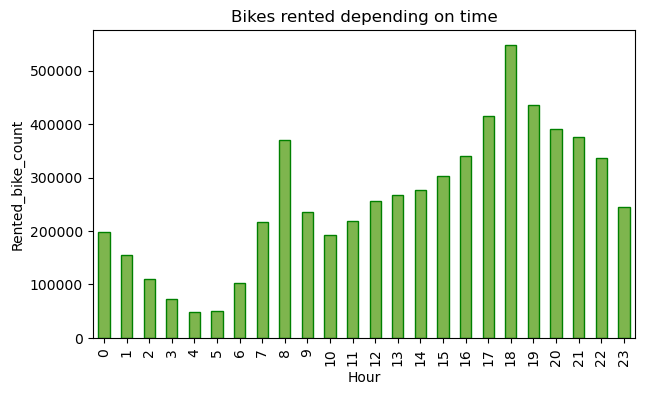

In [18]:

Rents_by_hour=dataset.groupby('Hour')['Rented_bike_count'].sum()
plt.figure(figsize=(7,4))
Rents_by_hour.plot(kind='bar',color='#7eb54e',edgecolor='green')
plt.xlabel('Hour')
plt.ylabel('Rented_bike_count')
plt.title('Bikes rented depending on time')
plt.show()


**Observation:** As we can see above,more number of bikes are rented during morning time and evening time.At morning 8 AM we see most bikes rented and then as noon passes we start to see the demand increased during evening time.The demand is low during Midnight time

#### 3. Total bikes rented on each day of week

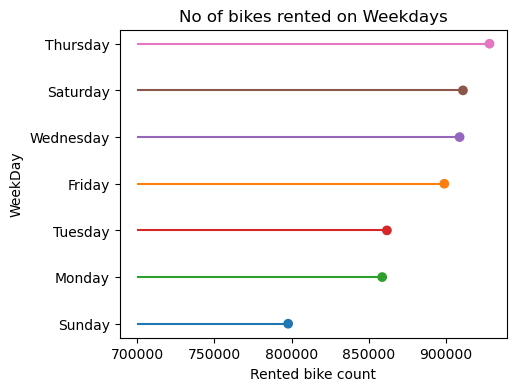

In [19]:

Rents_by_day=dataset.groupby('WeekDay')['Rented_bike_count'].sum().reset_index().sort_values(by='Rented_bike_count')
plt.figure(figsize=(5,4))
colour=['#1f77b4', '#2ca02c', '#d62728', '#ff7f0e', '#9467bd', '#8c564b', '#e377c2']
plt.hlines(y='WeekDay', xmin=700000, xmax='Rented_bike_count', color=colour,data=Rents_by_day)
plt.title('No of bikes rented on Weekdays')
plt.ylabel('WeekDay')
plt.xlabel('Rented bike count')
plt.scatter('Rented_bike_count','WeekDay',data=Rents_by_day,c=colour)


**Observation:** 
- The demand for bikes is higher on Thursday,Wednesday and Friday of the working days.As for weekends,people prefer to use bike on satureday only.
- Demand for bikes is less on sunday because of weekend.Monday and Tuesday we can say that people are starting their week so maybe because of working days,we see low demand on Monday and Tuesday.  

#### 4.Relation between Weekday and hour the bikes are rented for the demand

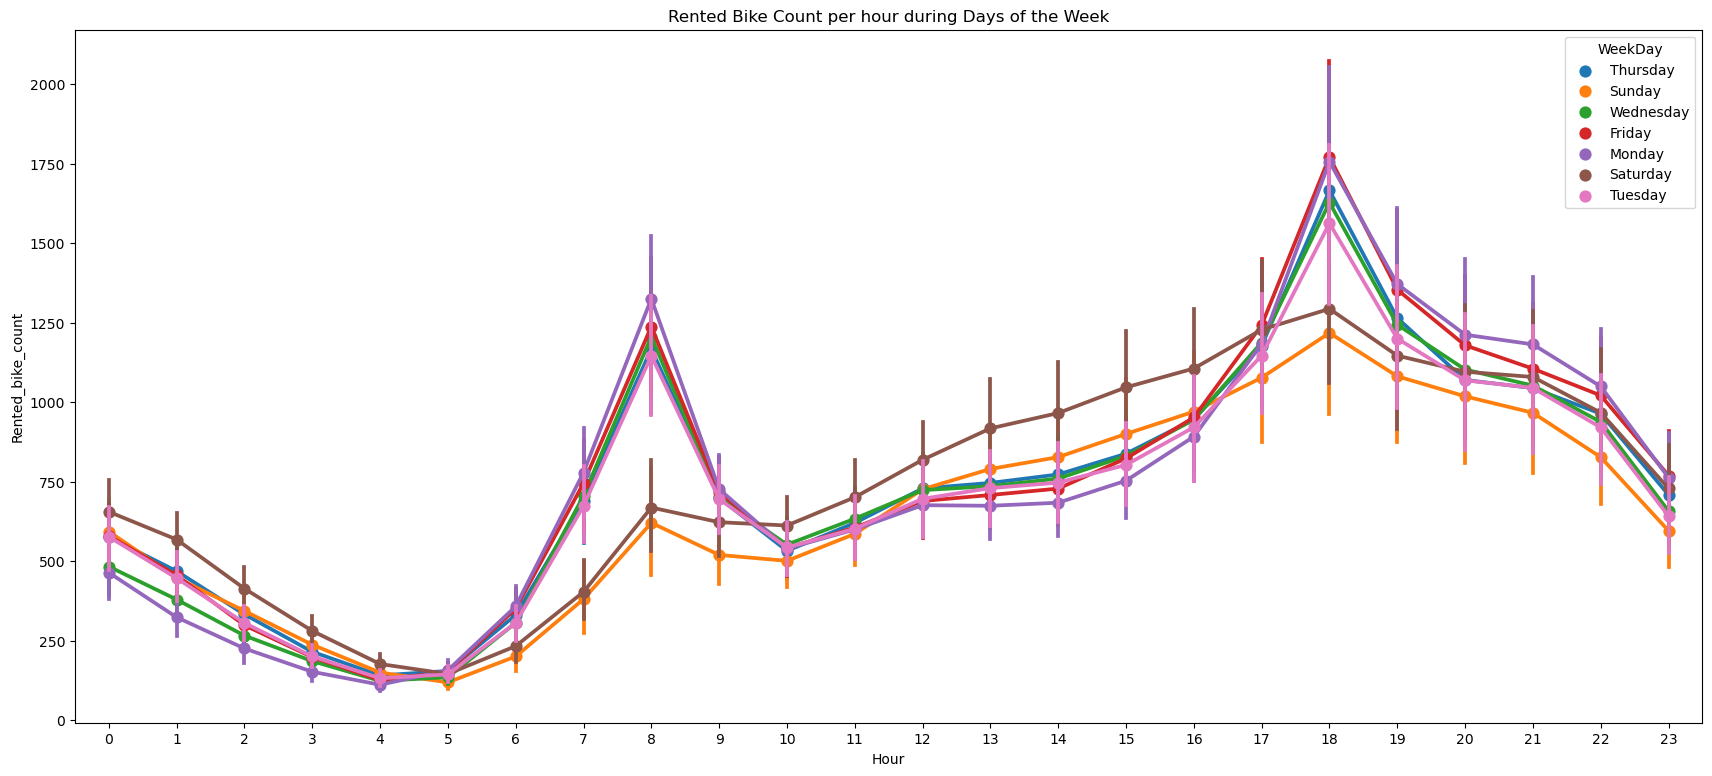

In [20]:

fig,ax=plt.subplots(figsize=(21,9))
sns.pointplot(x='Hour',y='Rented_bike_count',hue='WeekDay',data = dataset,ax=ax)
ax.set(title ='Rented Bike Count per hour during Days of the Week')
plt.show()


**Observation:**
- For Weekdays,The demand for bikes is very high during 6AM to 9AM,then we see slow demand for bikes during 11AM to 4PM because of working hours and higher temperature during noon time.Then as working hours end and temperature decreases we see sudden rise in demands of bikes from 4PM to 10PM.As the midnight closes we see reducing demand for bikes.
- For weekends,we see a gradually increasing demand on saturday irrespective of the time of the day,but number of bikes rented are comparatively low on weekends.Sunday is less preferred day by customer because of weekend holiday.

#### 5. Demands of bike for each month

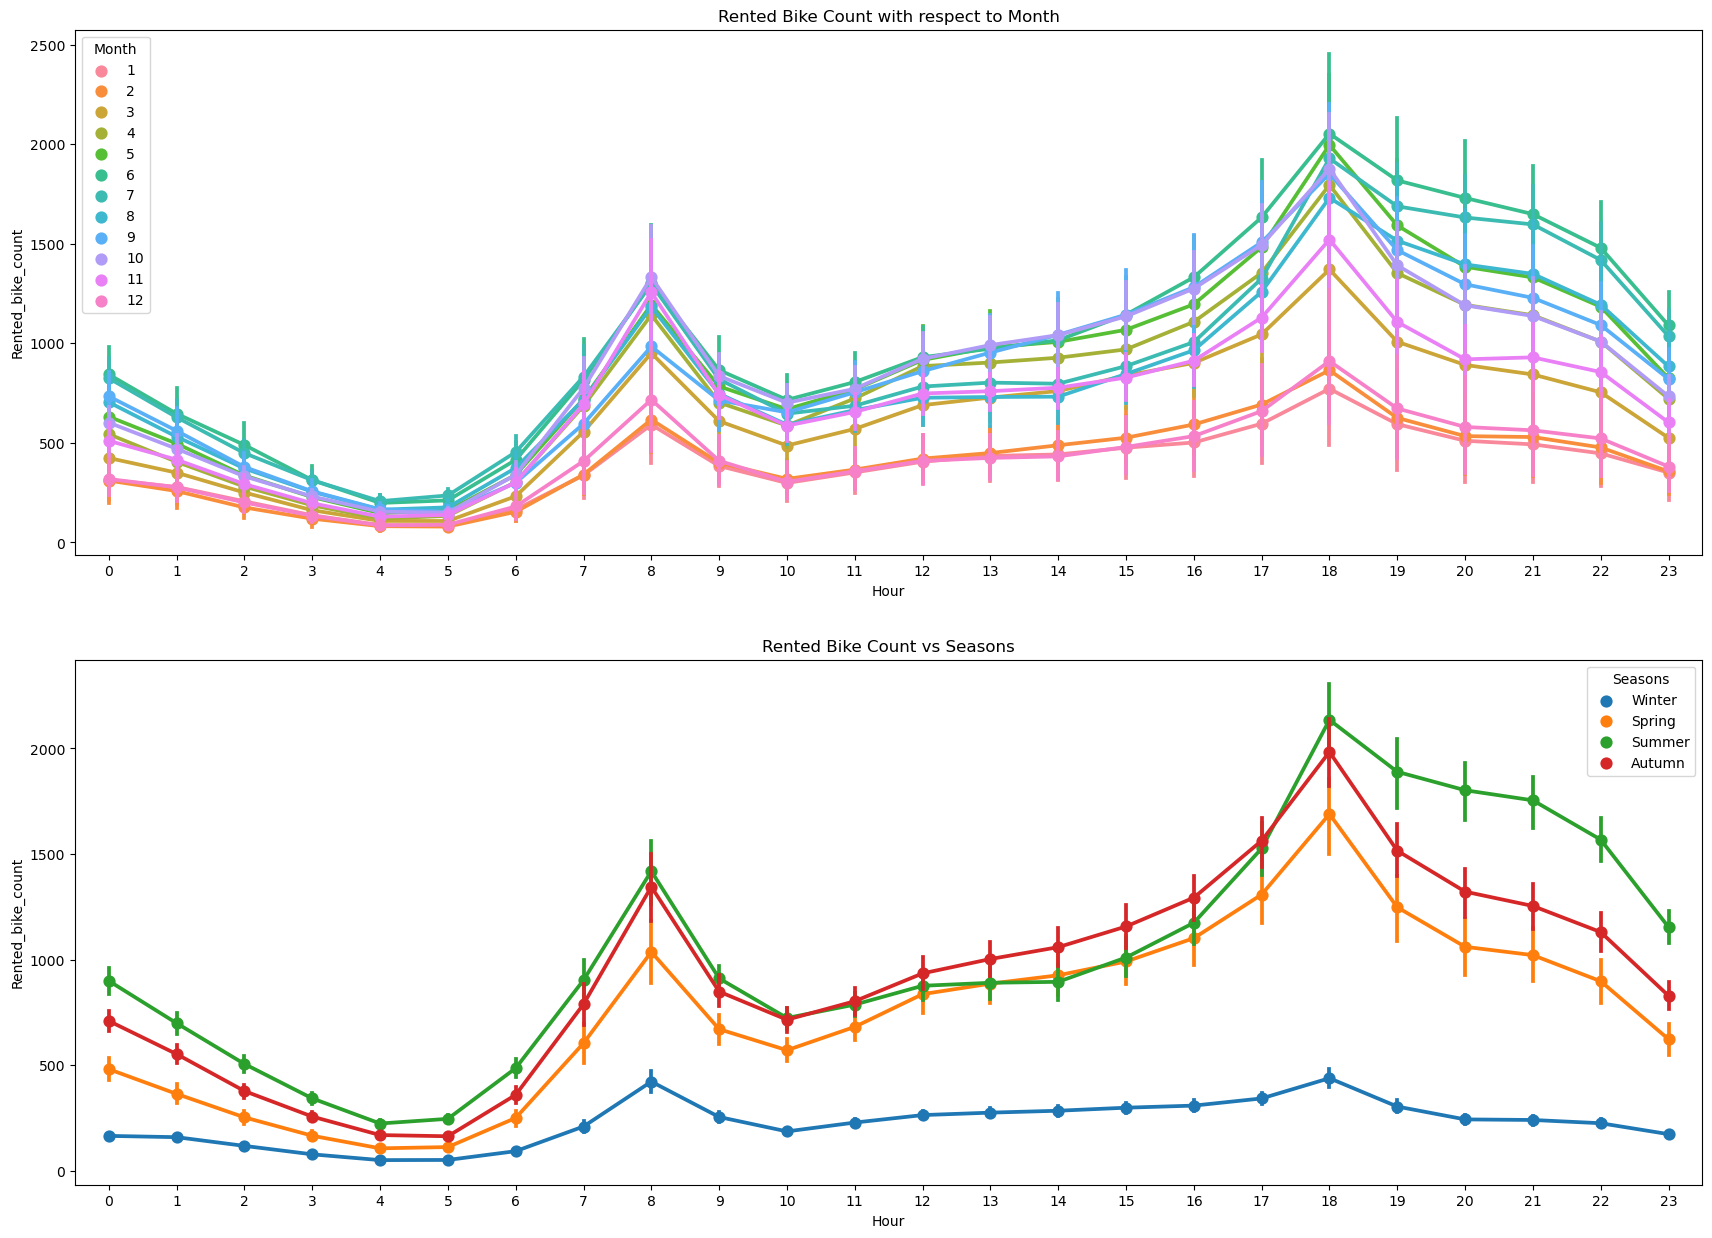

In [21]:

fig,(ax1,ax2)=plt.subplots(2,1,figsize=(21,15))
sns.pointplot(x='Hour',y='Rented_bike_count',hue='Month',data = dataset,ax=ax1)
ax1.set(title ='Rented Bike Count with respect to Month')

sns.pointplot(x='Hour',y='Rented_bike_count',hue='Seasons',data = dataset,ax=ax2)
ax2.set(title ='Rented Bike Count vs Seasons')
plt.show()


**Observation:** In chart above we can see that demands for rental bike is very low during December,January,February which is season of winter.Demand for bikes is high during April to August which is during the summer season. 

#### 6.Demands for bike during each season

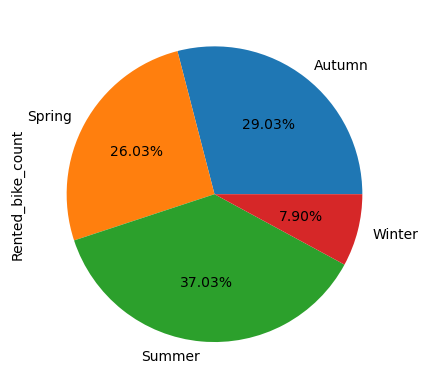

In [22]:

dataset.groupby('Seasons').sum()['Rented_bike_count'].plot.pie(autopct="%.2f%%")
plt.show()


**Observation:** As we can see above that bike renting is very less during winter time and highest during summer time.

#### 7.Changes in demand with changes in weather conditions

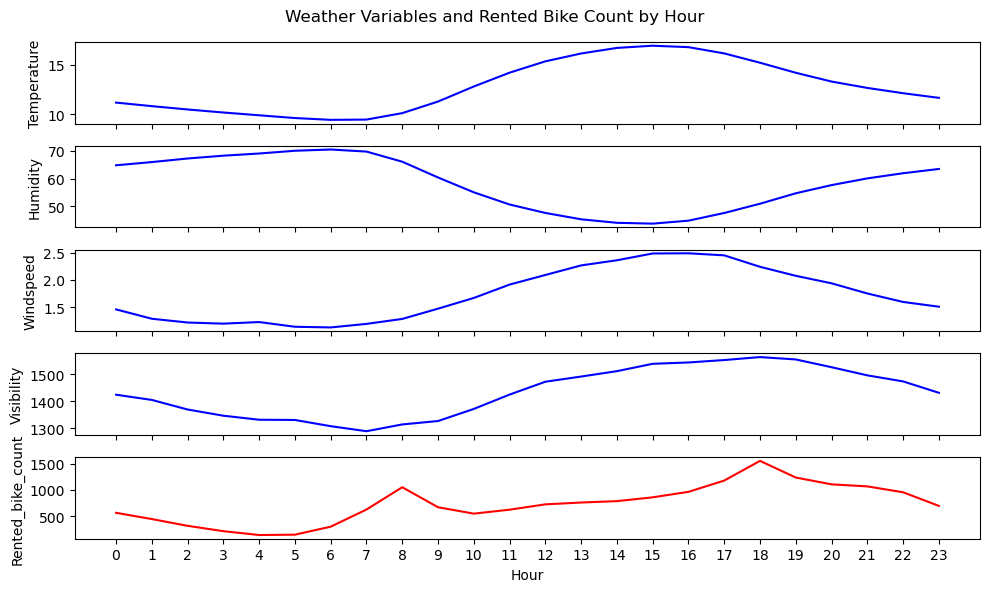

In [23]:

weather_eff=dataset.groupby('Hour')[['Temperature','Humidity','Windspeed','Visibility','Rented_bike_count']].mean()
weather_eff

features = ['Temperature', 'Humidity', 'Windspeed', 'Visibility','Rented_bike_count']

# Creating subplots
fig, axes = plt.subplots(len(features), 1, figsize=(10, 6), sharex=True)

# Looping through features and plotting subplots
for i, feature in enumerate(features):
    ax = axes[i]
    if feature == 'Rented_bike_count':
        sns.lineplot(data=weather_eff, x='Hour', y=feature, ax=ax, color='red')
    else:
        sns.lineplot(data=weather_eff, x='Hour', y=feature, ax=ax, color='blue')
    ax.set_ylabel(feature)
    ax.set_xticks(weather_eff.index)
    
axes[-1].set_xlabel('Hour')
plt.suptitle('Weather Variables and Rented Bike Count by Hour')
plt.tight_layout()
plt.show()


**Observation:** 
- Demand for bikes is directly proportional to the change in weather conditions of Temperature,Windspeed and Visibility.Which means the as these conditions changes from high to low,the demand also changes from high to low.
- When Humidity in surroundings is higher we see low demand for bike rentals.As temperature in Seoul region is 10 to 20 degree C,we can assume that temperature changes are unlikely to affect the Humidity in air as in other parts of world.

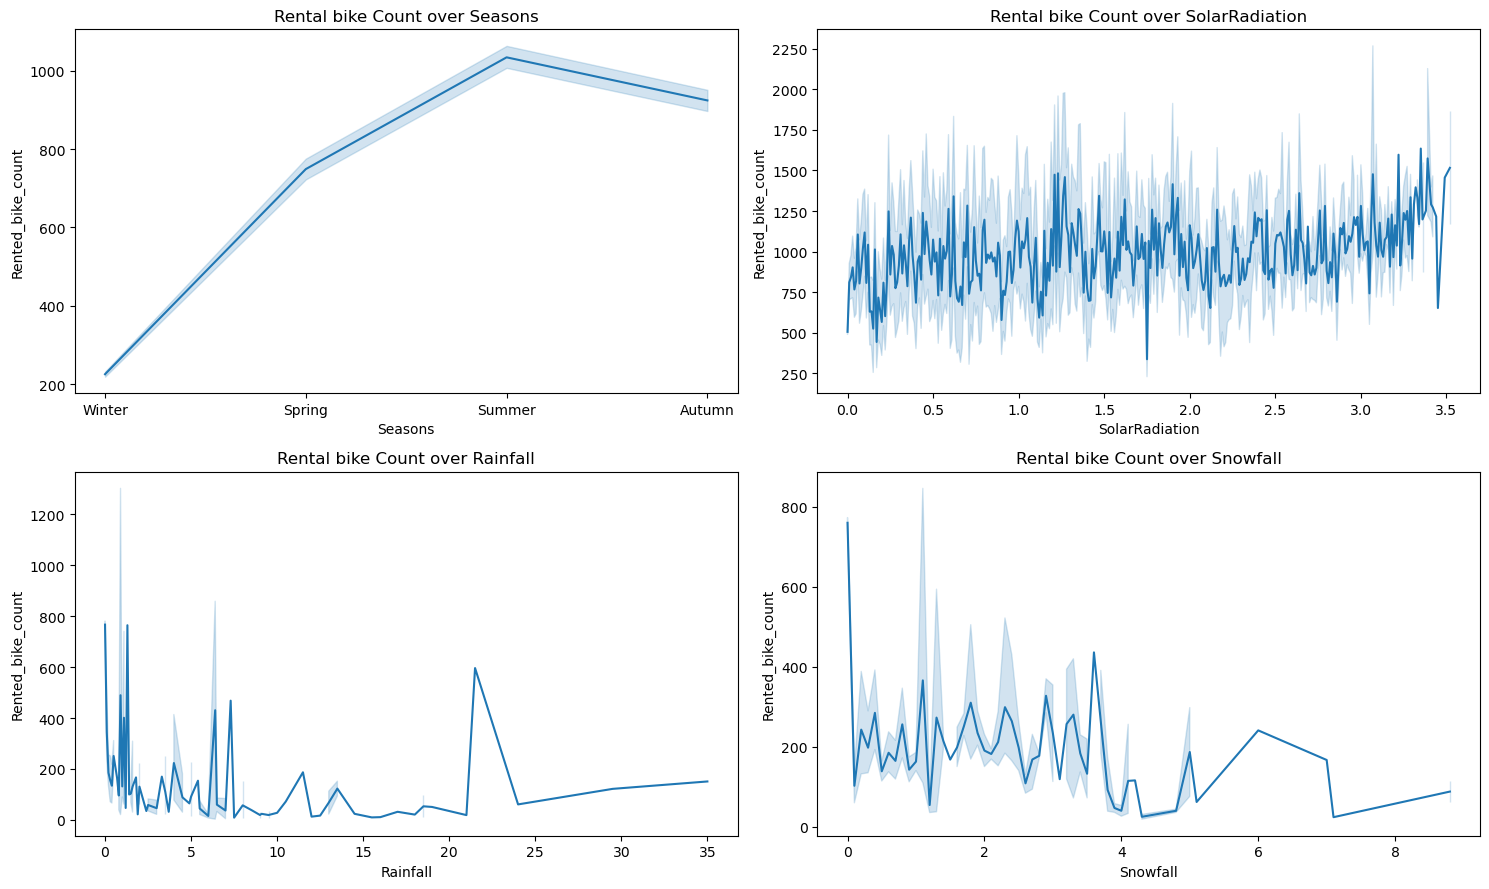

In [24]:

cat_columns=['Seasons','SolarRadiation','Rainfall','Snowfall']
n=1
plt.figure(figsize=(15,9))
for i in cat_columns:
  plt.subplot(2,2,n)
  n=n+1
  sns.lineplot(x=dataset[i],y=dataset['Rented_bike_count'])
  plt.title(f"Rental bike Count over {i}")
  plt.tight_layout()
plt.show()


**Observation:** From the chart above we can see that the count of bike demand reduces as there is more rainfall or snowfall.But the solar radiation does not affect the demand with high range.


### Distribution of the target feature

<Axes: xlabel='Rented_bike_count', ylabel='Density'>

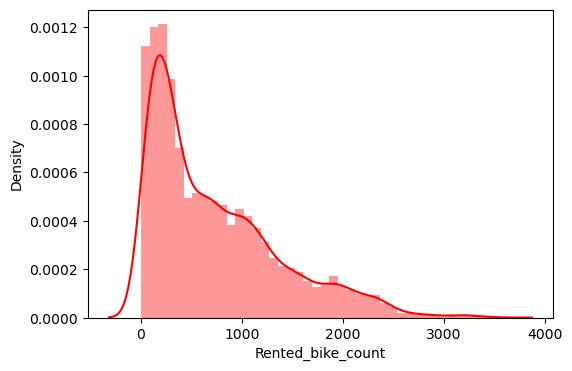

In [25]:
# distribution plot of target feature
plt.figure(figsize=(6,4))
sns.distplot(dataset['Rented_bike_count'],color='r')

**Observation:** The target feature 'Rented_bike_count' is positively skewed.So we have to use normalization techniques.

### Distribution of all features in dataset 

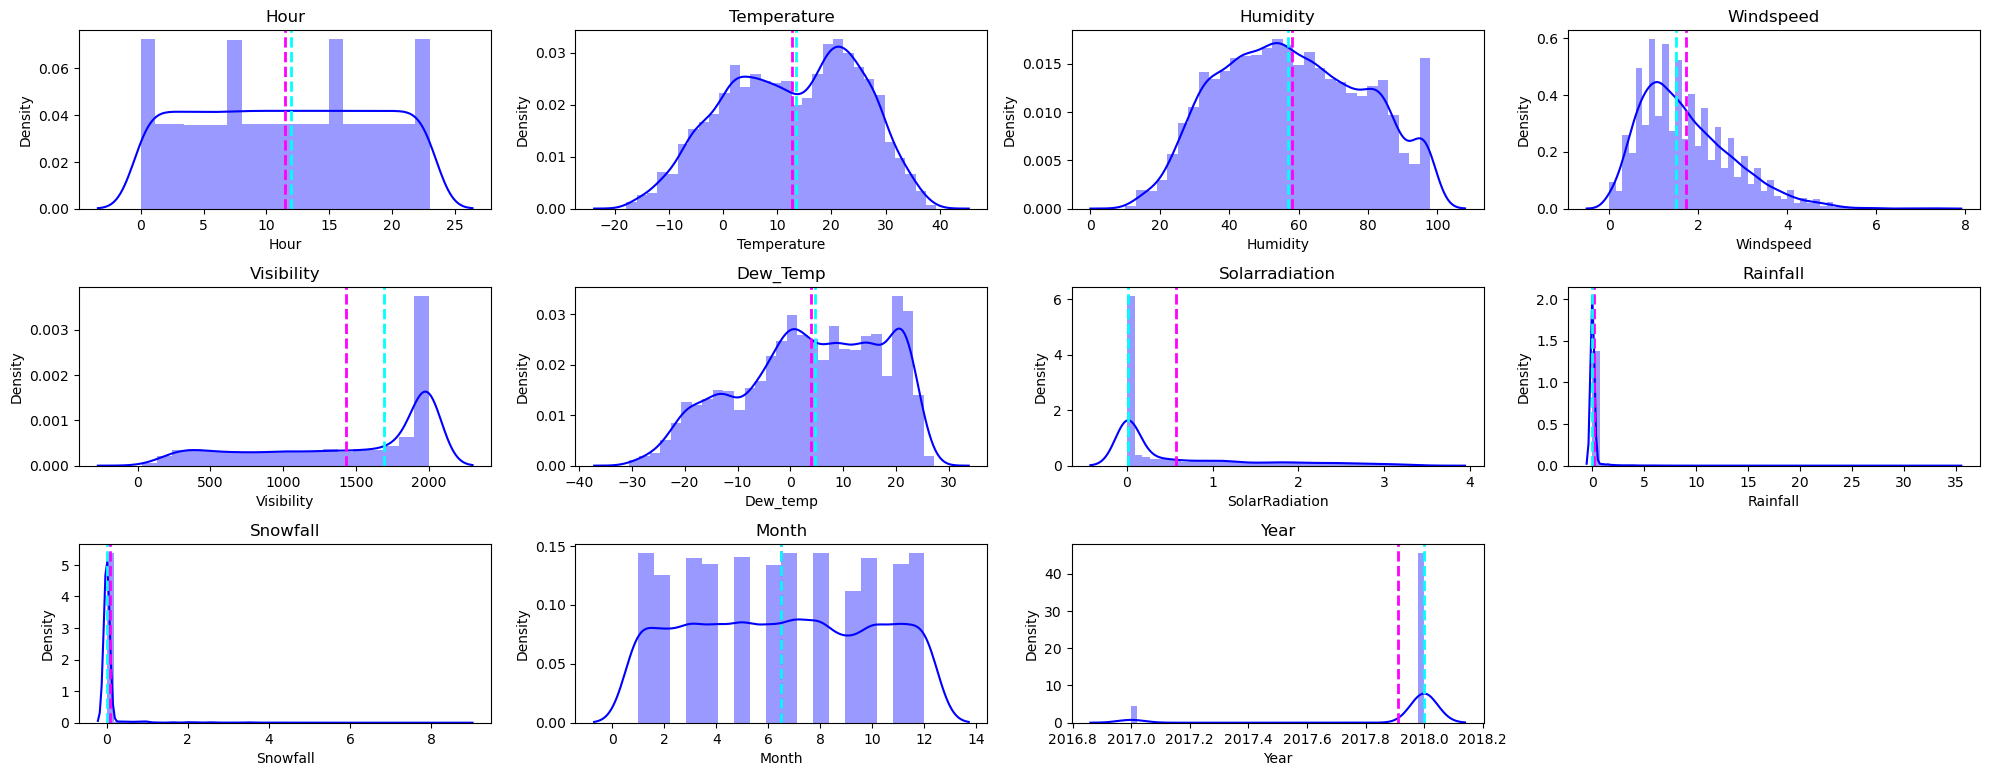

In [26]:
numerical_features = dataset.describe().columns

fig = plt.figure(figsize = (20,10))
for index,column in enumerate(numerical_features[1:]) :
  plt.subplot(4,4,index+1)
  sns.distplot(dataset[column],color='b')
  feature = dataset[column]
  ax = fig.gca()
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)  
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2) 
  plt.title(f'{column.title()}')
  plt.tight_layout()


**Observation:** 
- 'Windspeed' is positively skewed.
- 'Visibility' is highly negatively skewed.
- Features 'SolarRadiation','Rainfall' and 'Snowfall' are highly positively skewed but cannot be normalized.

### Outlier detection

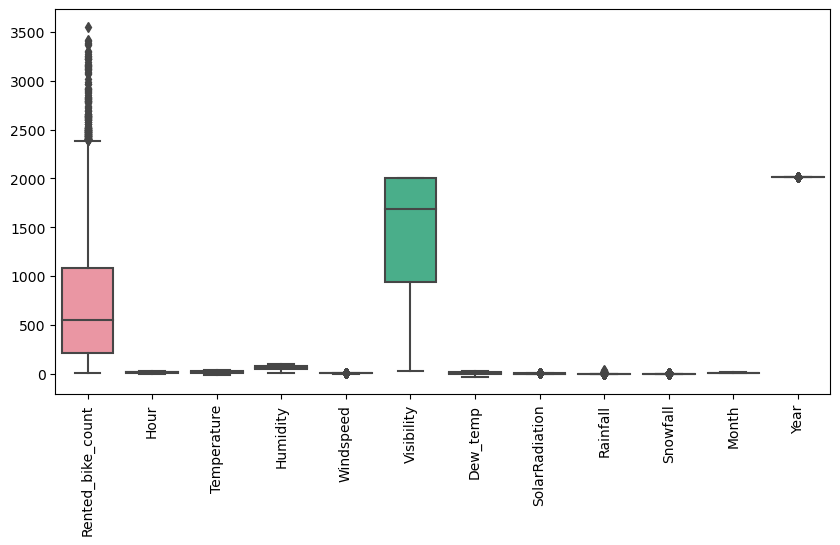

In [27]:
plt.figure(figsize=(10,5))   
plt.xticks(rotation =90)     
sns.boxplot(data =dataset)   
plt.show()

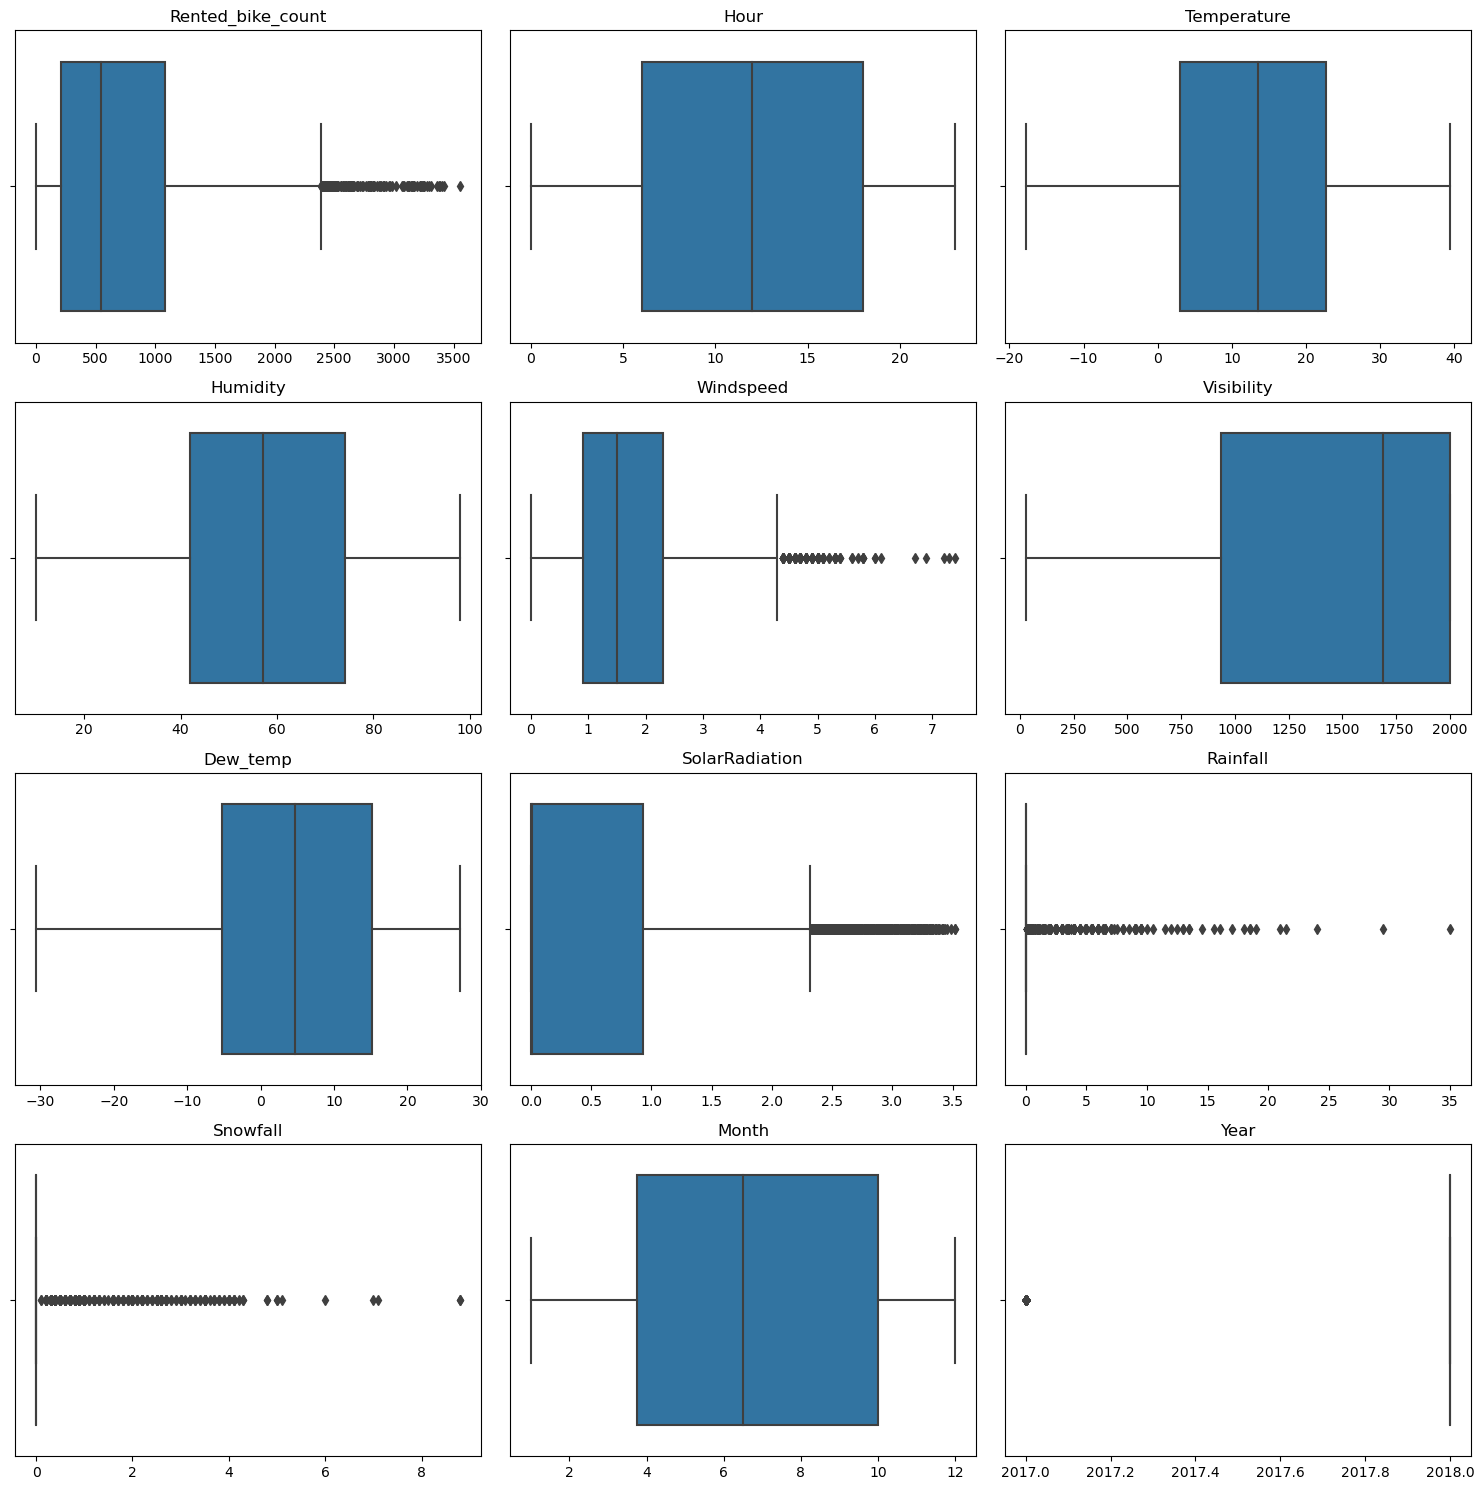

In [28]:
features = numerical_features

fig, axes = plt.subplots(4,3, figsize=(15,15))
axes = axes.flatten()
for i, feature in enumerate(features):
    ax = axes[i]
    sns.boxplot(data=dataset, x=feature, ax=ax)
    ax.set_title(feature)
    ax.set_xlabel('')
    
if len(features) < len(axes):
    for j in range(len(features), len(axes)):
        axes[j].axis('off')    

plt.tight_layout()
plt.show()


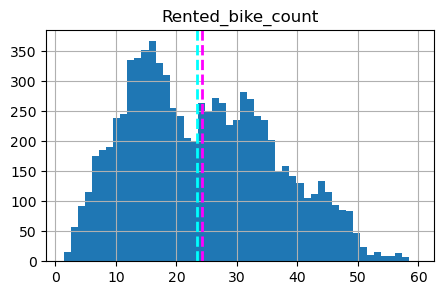

In [29]:
for col in numerical_features[[0]]:
    fig = plt.figure(figsize=(5,3))
    ax = fig.gca()
    feature = np.sqrt(dataset[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

### Correlation between Target feature and remaining features

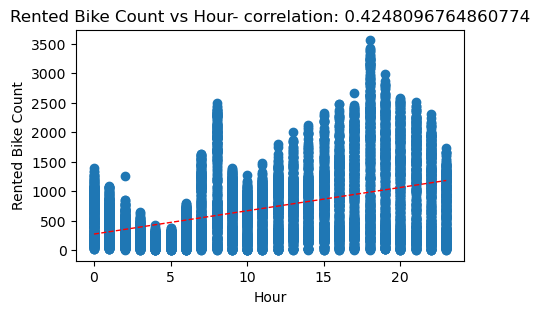

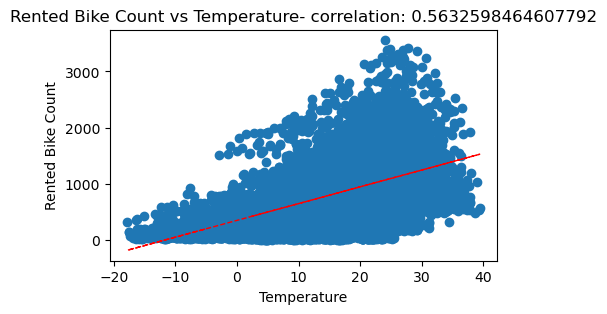

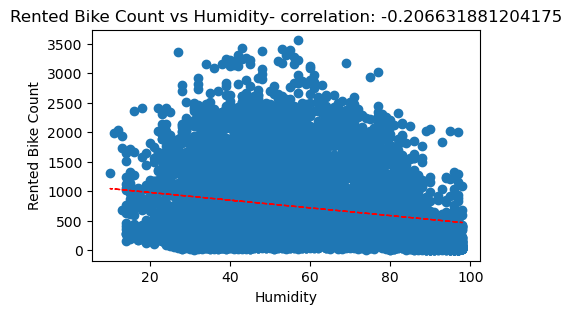

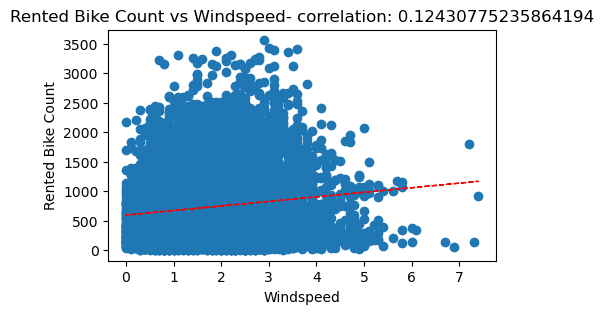

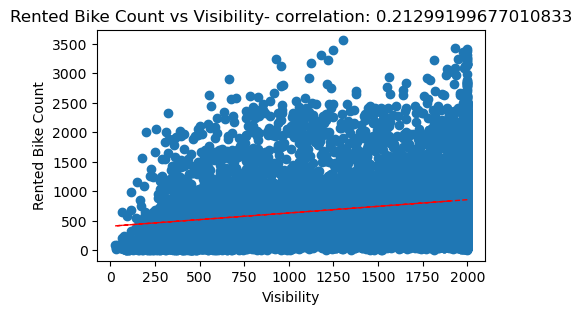

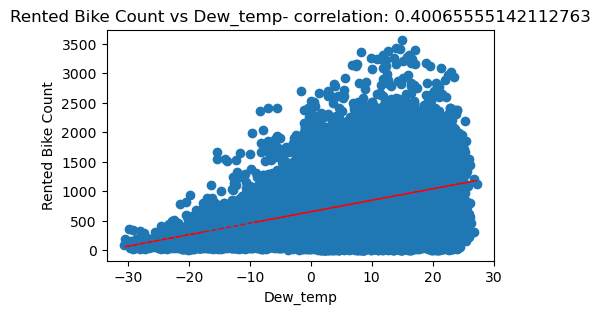

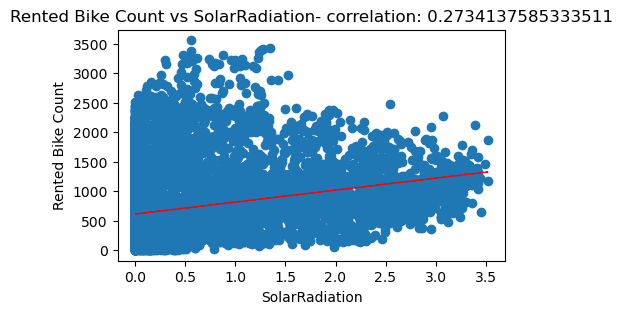

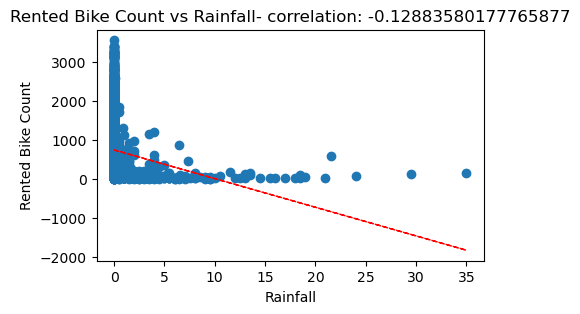

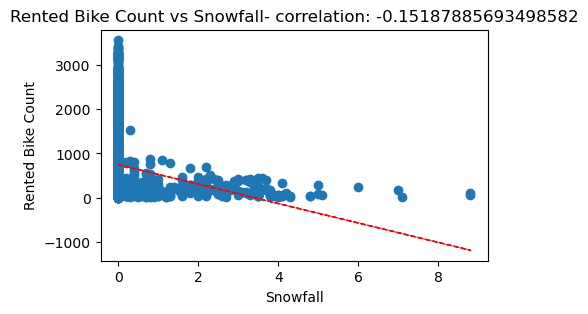

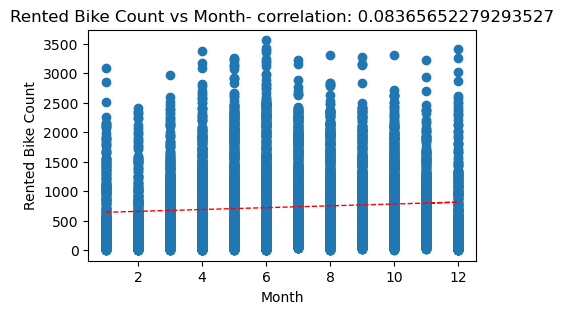

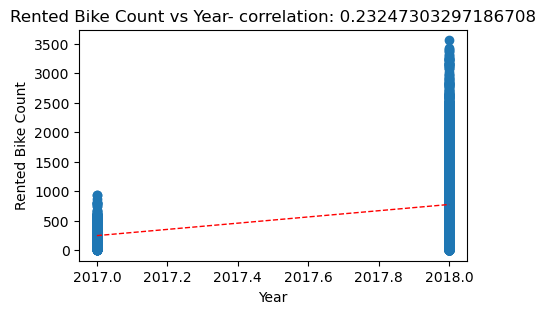

In [30]:
for col in numerical_features[1:]:
    fig = plt.figure(figsize=(5, 3))
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['Rented_bike_count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(dataset[col], dataset['Rented_bike_count'], 1)
    y_hat = np.poly1d(z)(dataset[col])

    plt.plot(dataset[col], y_hat, "r--", lw=1)

plt.show()

From the correlation plots above we can say that on first observation,that features such as 'Hour','Temperature','Windspeed','Visibility','Dew_temp' and 'SolarRadiation' are in positive correlation with the target feature.
While other features like 'Humidity','Rainfall' and 'Snowfall' are in negative correlation with the target feature.

### Categorical variables

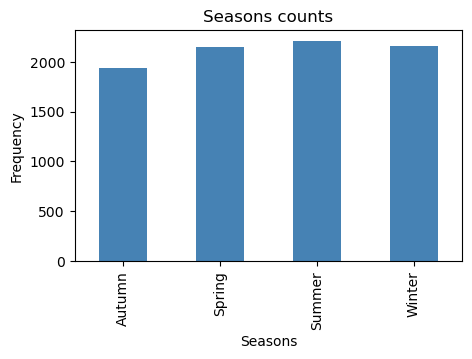

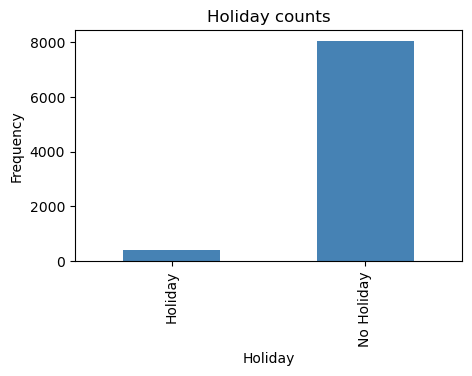

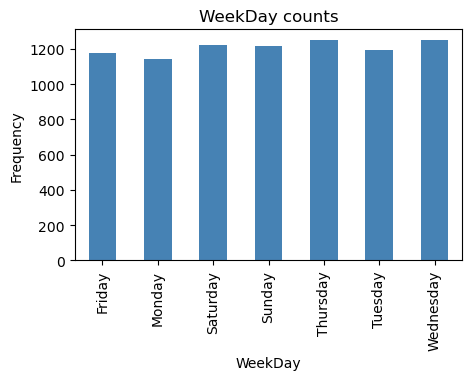

In [31]:
categorical_features = dataset.describe(include=['object','category']).columns
for col in categorical_features:
    counts = dataset[col].value_counts().sort_index()
    fig = plt.figure(figsize=(5, 3))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

From the Barplots above,we can see that categorical variables of 'Seasons' and 'Weekday' are evenly distributed.Although the count of bike rentals may vary depending on each season and weekday,there is no imbalance in categorical variables.
For most bike rentals are demanded on non-holidays,we see very less demand on holidays.

### Correlation Heatmap

<Axes: >

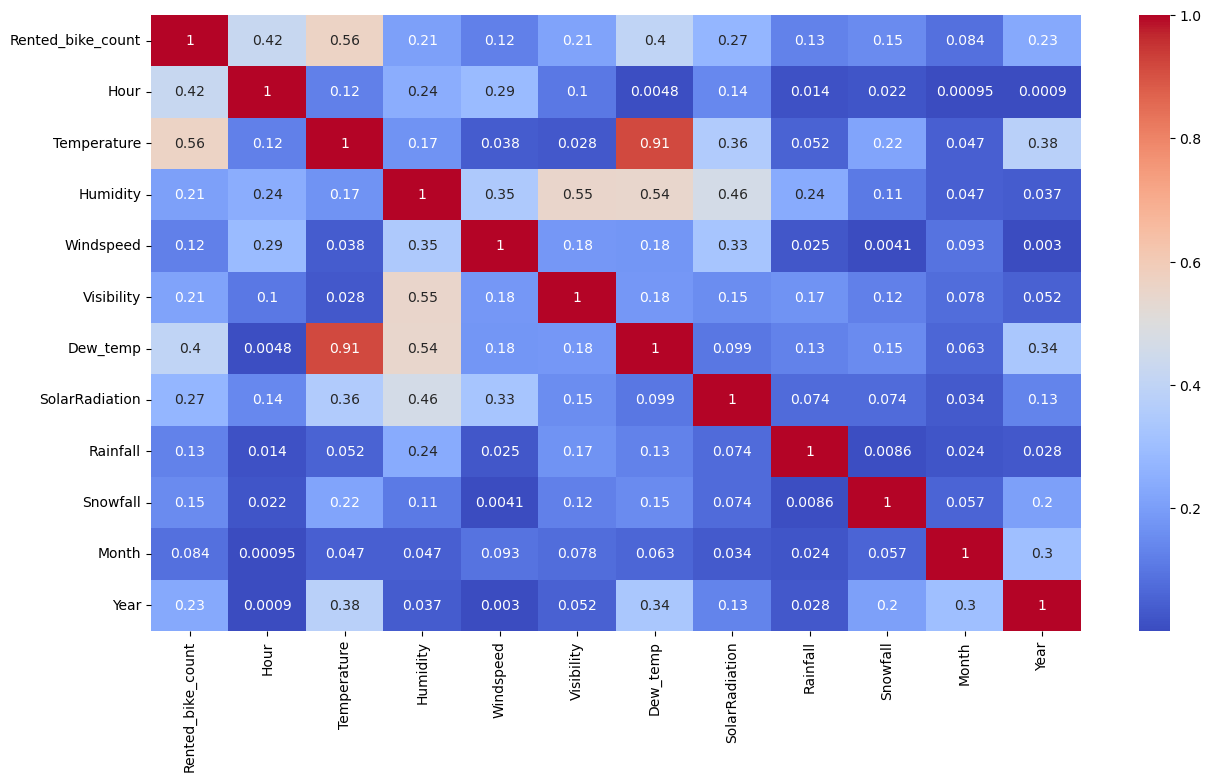

In [32]:
plt.figure(figsize=(15,8))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

feature 'Dew_temp' and 'Temperature' in data are highly coorelated so we will drop the 'Dew_temp' column from data 

In [33]:
dataset.drop(columns=['Dew_temp'],inplace=True) 

In [34]:
umerical_features=['Hour','Temperature','Humidity','Windspeed','Visibility','SolarRadiation','Rainfall','Snowfall','Month','Year']

### Data Encoding

In [35]:
dataset= pd.get_dummies(dataset, columns=['Seasons'],prefix='Is')
dataset=dataset.replace({'Holiday':{'Holiday':1, 'No Holiday':0}})

In [36]:
all_features=numerical_features.copy()
all_features.extend(['Holiday','Is_Autumn', 'Is_Spring','Is_Summer', 'Is_Winter'])

AttributeError: 'Index' object has no attribute 'extend'

### Checking for Multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(dataset[[i for i in dataset[all_features] if i not in ['Windspeed','Year','Is_Summer','Is_Winter']]])

In [ ]:
plt.figure(figsize=(15,8))
dataset.drop(columns=['Windspeed','Is_Summer', 'Is_Winter','Year'],inplace=True) 
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')


In [ ]:
from scipy.stats import zscore
#scaler=MinMaxScaler()

variables_to_delete = ['Windspeed','Is_Summer', 'Is_Winter','Year']
for variable in variables_to_delete:
    all_features.remove(variable)


In [ ]:

#X = scaler.fit_transform(dataset[all_features])
X= dataset[all_features].apply(zscore)


for col in ['Rainfall','Snowfall']:
    upper_limit = X[col].quantile(0.99)
    X[col] = np.where( X[col] > upper_limit, upper_limit,X[col])

plt.figure(figsize=(10,5))   
plt.xticks(rotation =90)     
sns.boxplot(data =X )    
plt.show()

In [ ]:
y=np.sqrt(dataset['Rented_bike_count'])

In [ ]:
#Train test split
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)